In [2]:
#Load Pre Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
##%%capture                
##! pip install seaborn    
import seaborn as sns
%matplotlib inline    
!pip install Folium
import folium

     |████████████████████████████████| 92kB 14.3MB/s eta 0:00:01


In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ed2637dd630949c89e9ef2e2a64cc11e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qkko9genTEYXGQWzZ20OMC5oN-VNBxEBa5RVdg3_oNLC',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='NYCdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-11T16:30:41.000,45597712,HEAT/HOT WATER,10473.0,875 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.821609,-73.872835,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-11T13:03:51.000,45595774,HEAT/HOT WATER,11236.0,1109 EAST 105 STREET,EAST 105 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.644055,-73.890798,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-11T05:14:53.000,45597773,HEAT/HOT WATER,10033.0,129 WADSWORTH AVENUE,WADSWORTH AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848828,-73.935690,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-11T15:51:07.000,45597745,HEAT/HOT WATER,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-11T10:14:47.000,45596755,HEAT/HOT WATER,11237.0,296 STANHOPE STREET,STANHOPE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.702471,-73.918679,NaN,RESIDENTIAL BUILDING,Open


In [3]:
df = df_data_0
df.shape

(6028330, 15)

In [4]:


# Selecting rows with 'HEAT/HOT WATER' 
df_complaint = df.loc[df['complaint_type']=='HEAT/HOT WATER'].dropna()

df_complaint_incident_zip= np.zeros(shape=(len(df_complaint['incident_zip'].unique()),2))
   
for i, zip_code in enumerate(df_complaint['incident_zip'].unique()):
#    df_complaint_address[i,0]=i
    df_complaint_incident_zip[i,0]=zip_code
    df_complaint_incident_zip[i,1]=sum(df_complaint['incident_zip']==zip_code)

# argument for area having maximum complaints
arg_max = np.argmax(df_complaint_incident_zip[:,1])
# zip address for maximum complaint location
zip_max_complaints = df_complaint_incident_zip[arg_max,0]
# maximum number of complaint in the above zip
maximum_complaints = np.max(df_complaint_incident_zip[:,1])

print('Zip area:', int(zip_max_complaints), 'has maxmimum no of complaints:', int(maximum_complaints))
# just to check out which borough had maximum complaints
print(df_complaint.set_index('incident_zip').loc[zip_max_complaints]['city'])



Zip area: 11226 has maxmimum no of complaints: 41909
incident_zip
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
             ...   
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BROOKLYN
11226.0    BRO

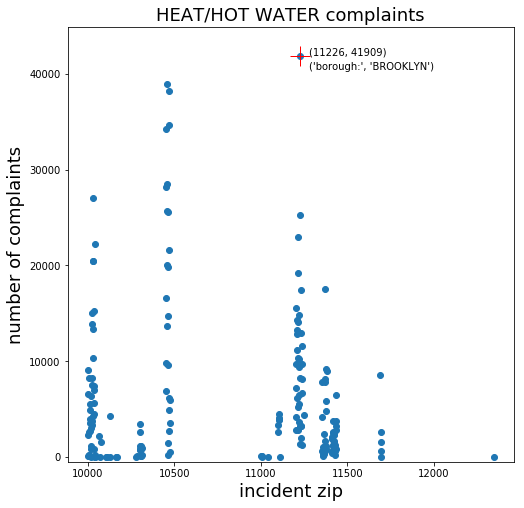

In [5]:
#plot
plt.figure(figsize=(8,8))
plt.scatter(df_complaint_incident_zip[:,0],df_complaint_incident_zip[:,1])
plt.plot(zip_max_complaints, maximum_complaints, 'r+', markersize=20)
plt.text(zip_max_complaints+50, maximum_complaints,(int(zip_max_complaints),int(maximum_complaints)))
plt.text(zip_max_complaints+50, maximum_complaints-1500, ('borough:', 'BROOKLYN'))
plt.xlabel('incident zip', fontsize = 18)
plt.ylabel('number of complaints', fontsize= 18)
plt.title('HEAT/HOT WATER complaints', fontsize = 18)
plt.ylim((-500, int(maximum_complaints)+3000))
plt.rcParams.update({'font.size': 12})

In [6]:
#df_complaint.columns.values
#df = df_complaint.loc[df_complaint['incident_zip'].unique(),['borough', 'city', 'incident_zip', 'latitude', 'longitude']]
#df.shape
df_complaint = df.loc[df['complaint_type']=='HEAT/HOT WATER'].dropna()

#df_complaint.index = range(len(df_complaint.index))
##df_complaint = df_complaint.reindex(new_index)
df = df_complaint.loc[:,['borough', 'city', 'incident_zip']]
##df = df.set_index('incident_zip')
##df = df['incident_zip'].drop_duplicates(keep='first')
df = df.loc[~df['incident_zip'].duplicated()]
##df.groupby(['incident_zip', 'borough']).sum()
##df.index.drop_duplicates(keep='first')
df = df.sort_values(by = ['incident_zip'], ascending=True)
df.index = range(len(df.index))


# for no of complaints
df_number_incidents = df_complaint[['incident_zip', 'unique_key']].groupby(['incident_zip']).count()['unique_key']
df_number_incidents.index = range(len(df_number_incidents.index))



df_geo = df_complaint[['incident_zip', 'latitude', 'longitude']]
df_geo = df_geo.groupby(['incident_zip']).mean()
df_geo = df_geo.reset_index()
#df_geoplot = df_geoplot.groupby(['incident_zip']).size()
df_geo.loc[:, 'borough'] = df.loc[:,'borough']
df_geo.loc[:, 'city'] = df.loc[:, 'city']
df_geo['no_of_complaints'] = df_number_incidents
df_geo.head(3)

,incident_zip,latitude,longitude,borough,city,no_of_complaints
0,10001.0,40.748781,-73.995898,MANHATTAN,NEW YORK,2287
1,10002.0,40.717126,-73.989537,MANHATTAN,NEW YORK,9127
2,10003.0,40.730404,-73.987882,MANHATTAN,NEW YORK,6610


/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


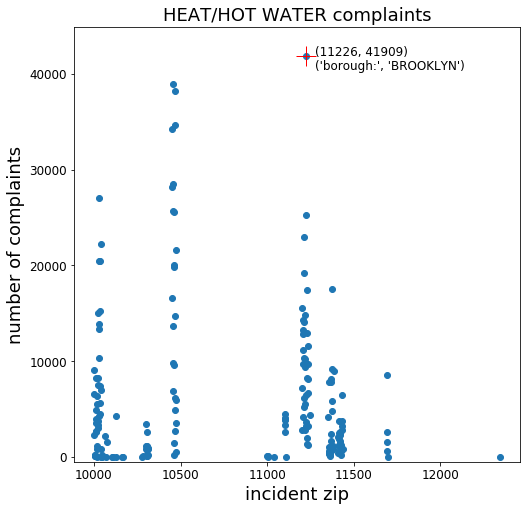

In [7]:
# argument for area having maximum complaints
arg_max = np.argmax(df_geo.loc[:,'no_of_complaints'])
# maximum number of complaint in the above zip
maximum_complaints = np.max(df_geo.loc[:,'no_of_complaints'])
# zip address for maximum complaint location
zip_max_complaints = df_geo.loc[arg_max,'incident_zip']

#plot
plt.figure(figsize=(8,8))
plt.scatter(df_geo.loc[:,'incident_zip'],df_geo.loc[:,'no_of_complaints'])
plt.plot(zip_max_complaints, maximum_complaints, 'r+', markersize=20)
plt.text(zip_max_complaints+50, maximum_complaints,(int(zip_max_complaints),int(maximum_complaints)))
plt.text(zip_max_complaints+50, maximum_complaints-1500, ('borough:', 'BROOKLYN'))
plt.xlabel('incident zip', fontsize = 18)
plt.ylabel('number of complaints', fontsize= 18)
plt.title('HEAT/HOT WATER complaints', fontsize = 18)
plt.ylim((-500, int(maximum_complaints)+3000))
plt.rcParams.update({'font.size': 12})

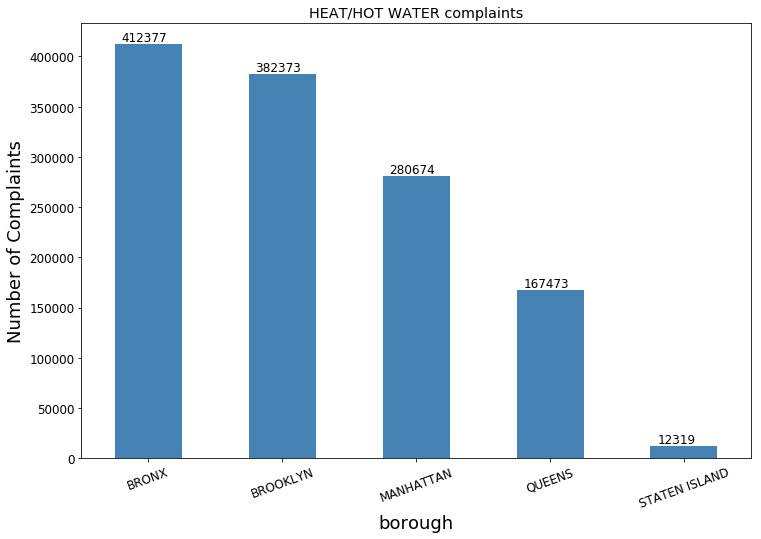

In [8]:
# use borough to get no of complaints statistics
#fig, ax = plt.subplots(figsize=(19,7))
df_borough = df_geo[['borough', 'no_of_complaints']].groupby(['borough']).sum()
df_borough = df_borough.reset_index()
df_borough.loc[:,'val'] = df_borough.loc[:,'no_of_complaints']
df_borough.loc[:,'x'] = range(len(df_borough.no_of_complaints))

ax = df_borough.set_index('borough')['no_of_complaints'].plot(kind='bar', figsize=(12, 8), color='steelblue')
plt.xlabel('borough', size = 18)
plt.ylabel('Number of Complaints', size = 18)
plt.title('HEAT/HOT WATER complaints')

# annotate value labels to each country
def label_point(x, no_of_complaints, val, ax):
    a = pd.concat({'x': x, 'no_of_complaints': no_of_complaints, 'val':val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['no_of_complaints'], str(int(point['val'])))   

        
        
label_point(df_borough.x-0.20, df_borough.no_of_complaints+2700, df_borough.val, ax)
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation = 20)
plt.show()

In [9]:
df_borough = df_geo[['borough', 'no_of_complaints']].groupby(['borough']).sum()
df_borough = df_borough.reset_index()
df_borough.loc[:,'val'] = df_borough.loc[:,'no_of_complaints']

df_borough.val

0    412377
1    382373
2    280674
3    167473
4     12319
Name: val, dtype: int64

In [10]:
# let's start again with a clean copy of the map of NYC centered around BROOKLYN
NYC_map = folium.Map(location=[df_geo['latitude'].mean(),df_geo['longitude'].mean()], zoom_start=12)

NYC_map

In [11]:
latitudes = list(df_geo.latitude)
longitudes = list(df_geo.longitude)
labels = list(map(str, df_geo.incident_zip.astype(int)))

In [12]:


from folium.plugins import MarkerCluster

# instantiate a mark cluster object for the incidents in the dataframe
complaints = MarkerCluster().add_to(NYC_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(complaints)

# display map
NYC_map




<font color=red> Concluding Remark:

    The above analysis shows the severly affected boroughs with the HEATING complaints. In addition we show the number of complaints in histogram visulization.
    Furthermore, to make the use of zip code I have used street view map and clusters to represent the problem affected area more concisely. This map is interactive and hence gives managers to spot immidiatley the top complaints areas.

